In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
import argparse
import os
from tensorflow.keras.applications import ResNet50V2

In [ ]:
import numpy as np

data=np.load('/content/drive/MyDrive/deeplearningproject/data.npy')
labels=np.load('/content/drive/MyDrive/deeplearningproject/labels.npy')

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
aug = ImageDataGenerator(
  featurewise_center=False,  
  samplewise_center=False,  
  featurewise_std_normalization=False,  
  samplewise_std_normalization=False,  
  zca_whitening=False,
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
IMG_SIZE = 224
CHANNELS = 3
N_LABELS=2

feature_extractor_layer = ResNet50V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(IMG_SIZE,IMG_SIZE,CHANNELS)))

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
feature_extractor_layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Flatten(name="flatten"),
    layers.Dense(128, activation='relu', name='hidden_layer'),
    layers.Dropout(0.5),
    layers.Dense(N_LABELS, activation='sigmoid', name='output')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               12845184  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 36,410,242
Trainable params: 12,845,442
Non-trainable params: 23,564,800
_________________________________________________________________


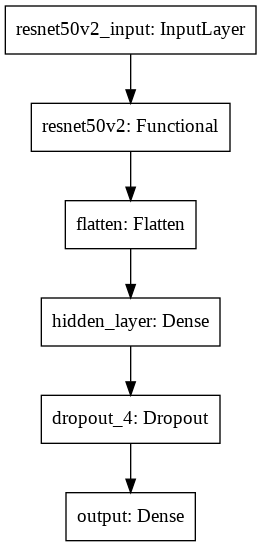

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
LR = 1e-4 # öğrenme oranı
EPOCHS = 20
BS = 32

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
  loss="binary_crossentropy",
  metrics=["accuracy"])

In [ ]:
history = model.fit(aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	epochs=EPOCHS)

Epoch 1/20
188/188 [==============================] - 699s 4s/step - loss: 0.1348 - accuracy: 0.9640 - val_loss: 0.0346 - val_accuracy: 0.9960
Epoch 2/20
188/188 [==============================] - 704s 4s/step - loss: 0.0345 - accuracy: 0.9913 - val_loss: 0.0250 - val_accuracy: 0.9960
Epoch 3/20
188/188 [==============================] - 705s 4s/step - loss: 0.0381 - accuracy: 0.9918 - val_loss: 0.0280 - val_accuracy: 0.9960
Epoch 4/20
188/188 [==============================] - 706s 4s/step - loss: 0.0477 - accuracy: 0.9879 - val_loss: 0.0222 - val_accuracy: 0.9960
Epoch 5/20
188/188 [==============================] - 709s 4s/step - loss: 0.0346 - accuracy: 0.9931 - val_loss: 0.0254 - val_accuracy: 0.9947
Epoch 6/20
188/188 [==============================] - 707s 4s/step - loss: 0.0282 - accuracy: 0.9902 - val_loss: 0.0216 - val_accuracy: 0.9967
Epoch 7/20
188/188 [==============================] - 702s 4s/step - loss: 0.0321 - accuracy: 0.9929 - val_loss: 0.0284 - val_accuracy: 0.9947

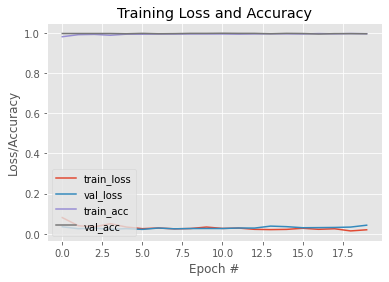

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
model.save_weights('/content/drive/MyDrive/deeplearningproject/ResNetModel.h5')